# Import libraries

Import all necessary libraries.

In [11]:
import sys
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Now time to ensure that MnistClassifier and function load_and_transform_mnist_data is possible to import without errors.

In [12]:
# The import logic should work if 'mnist_classifier.py' is in the `src/utils/classes/` folder
# and 'load_and_transform_mnist_data.py' is in the 'src/utils/' folder.
try:
    from src.utils.classes.mnist_classifier import MnistClassifier
    print("Successfully imported MnistClassifier.")
except ImportError as e:
    print(f"Import Error: {e}")
    print("Ensure that 'src/utils/classes/mnist_classifier.py' is in the Python path.")

try:
    from src.utils.load_and_transform_mnist_data import load_and_transform_mnist
    print("Successfully imported data loading helper.")
except ImportError as e:
    print(f"Import Error: {e}")
    print("Ensure that 'src/utils/load_and_transform_mnist_data.py' is in the Python path.")

Successfully imported MnistClassifier.
Successfully imported data loading helper.


If error persists, please check the file paths and your PYTHONPATH environment variable.
Then, import theese modules again.

In [13]:
from src.utils.classes.mnist_classifier import MnistClassifier
from src.utils.load_and_transform_mnist_data import load_and_transform_mnist

# Data Loading and Splitting

In [14]:
X_full, y_full, X_test = load_and_transform_mnist()
print(f"Full Dataset Loaded: X_full shape {X_full.shape}, y_full shape {y_full.shape}")

Full Dataset Loaded: X_full shape (60000, 28, 28), y_full shape (60000,)


After successful splitting the dataset, the subset for quick training is created (for instance 10000 samples).

In [15]:
# Prepare a subset for quick training demo (e.g., 10000 samples)
SAMPLE_SIZE = 10000
TEST_SIZE = 0.3

# Create the training/validation split from the subset
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_full[:SAMPLE_SIZE], y_full[:SAMPLE_SIZE], test_size=TEST_SIZE, random_state=42, stratify=y_full[:SAMPLE_SIZE]
)

print("-" * 30)
print(f"Subset for Demo Training: {X_train_sub.shape}")
print(f"Subset for Demo Validation: {X_val.shape}")
print("-" * 30)

------------------------------
Subset for Demo Training: (7000, 28, 28)
Subset for Demo Validation: (3000, 28, 28)
------------------------------


# Random Forest Classifier (rf) Demo

After splitting the dataset, time to cteate instance of MnistClassifier class with algorithm='rf', train model and predict validation dataset.

In [16]:
rf_classifier = MnistClassifier(algorithm='rf', n_estimators=10, random_state=42)

# Train the model
rf_classifier.train(X_train_sub, y_train_sub)

# Make predictions on the validation set
rf_predictions = rf_classifier.predict(X_val)

# Evaluate performance
rf_accuracy = accuracy_score(y_val, rf_predictions)
print(f"\nRandom Forest Accuracy on Validation Set: {rf_accuracy * 100:.2f}%")
print(f"Prediction output structure: {rf_predictions.shape} (Type: {type(rf_predictions)})")

Training Random Forest...
Random Forest training complete.

Random Forest Accuracy on Validation Set: 89.97%
Prediction output structure: (3000,) (Type: <class 'numpy.ndarray'>)


# Feed-Forward Neural Network (nn) Demo

Second algorithm to test is Feed-Forward Neural Network (algorithm='nn').

In [17]:
# Using 3 epochs for a fast demonstration
nn_classifier = MnistClassifier(algorithm='nn', hidden_size=64) 

# Train the model with specific PyTorch parameters
nn_classifier.train(X_train_sub, y_train_sub, epochs=3, batch_size=128)

# Make predictions on the validation set
nn_predictions = nn_classifier.predict(X_val)

# Evaluate performance
nn_accuracy = accuracy_score(y_val, nn_predictions)
print(f"\nFeed-Forward NN Accuracy on Validation Set: {nn_accuracy * 100:.2f}%")
print(f"Prediction output structure: {nn_predictions.shape} (Type: {type(nn_predictions)})")

Training Feed-Forward Network for 3 epochs...
Epoch [1/3], Loss: 0.3611
Epoch [2/3], Loss: 0.0950
Epoch [3/3], Loss: 0.1132
Feed-Forward Network training complete.

Feed-Forward NN Accuracy on Validation Set: 92.00%
Prediction output structure: (3000,) (Type: <class 'numpy.ndarray'>)


# Convolutional Neural Network (cnn) Demo

Third algorithm to test is Convolutional Neural Network (algorithm='cnn').

In [18]:
cnn_classifier = MnistClassifier(algorithm='cnn') 

# Train the model with specific PyTorch parameters
cnn_classifier.train(X_train_sub, y_train_sub, epochs=2, batch_size=128)

# Make predictions on the validation set
cnn_predictions = cnn_classifier.predict(X_val)

# Evaluate performance
cnn_accuracy = accuracy_score(y_val, cnn_predictions)
print(f"\nCNN Accuracy on Validation Set: {cnn_accuracy * 100:.2f}%")
print(f"Prediction output structure: {cnn_predictions.shape} (Type: {type(cnn_predictions)})")

Training CNN for 2 epochs...
Epoch [1/2], Loss: 0.2985
Epoch [2/2], Loss: 0.2505
CNN training complete.

CNN Accuracy on Validation Set: 92.33%
Prediction output structure: (3000,) (Type: <class 'numpy.ndarray'>)


# Edge Cases and Consistency Check

## Consistent Output Structure

Ensuring that the MnistClassifier class return a NumPy array of predictions with the same shape.

RF Predictions Shape: (3000,), Data Type: int64
NN Predictions Shape: (3000,), Data Type: int64
CNN Predictions Shape: (3000,), Data Type: int64

Sample Validation Image:


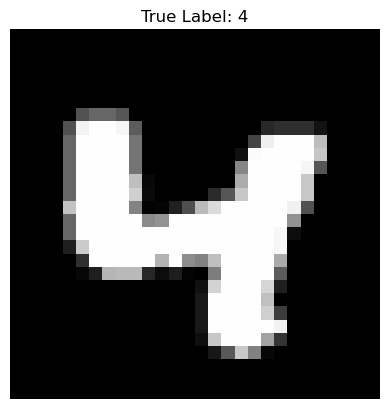


Model Predictions for sample #5:
  Random Forest: 4
  Feed-Forward NN: 4
  CNN: 4


In [19]:
print(f"RF Predictions Shape: {rf_predictions.shape}, Data Type: {rf_predictions.dtype}")
print(f"NN Predictions Shape: {nn_predictions.shape}, Data Type: {nn_predictions.dtype}")
print(f"CNN Predictions Shape: {cnn_predictions.shape}, Data Type: {cnn_predictions.dtype}")

# Display a sample of predictions from all models for visual inspection
sample_index = 5
print("\nSample Validation Image:")
plt.imshow(X_val[sample_index], cmap='gray')
plt.title(f"True Label: {y_val[sample_index]}")
plt.axis('off')
plt.show()

print(f"\nModel Predictions for sample #{sample_index}:")
print(f"  Random Forest: {rf_predictions[sample_index]}")
print(f"  Feed-Forward NN: {nn_predictions[sample_index]}")
print(f"  CNN: {cnn_predictions[sample_index]}")

## Invalid Algorithm Name

Attempting to initialize the MnistClassifier with an unknown algorithm should raise a ValueError, which is correctly handled in the class constructor.

In [20]:
invalid_classifier = MnistClassifier(algorithm='svm')

ValueError: Unknown algorithm: svm. Must be one of ['rf', 'nn', 'cnn']

In result, proper ValueError was raised: Unknown algorithm: svm. Must be one of ['rf', 'nn', 'cnn'].

# Summary

So, after set up of the project and loading the dataset, splitting to train and validation of dataset was done. As it is demo, only part of data was used for training (10000 samples). Then, 3 different models (such as: RandomForestClassifier, FeedForwardNN, CNN)  were used . In result, the best accuracy metric was reached by FeedForwardNN with lr=0.01, epochs=3 and batch_size=128 on validation dataset is 93.0%. Maybe each model can be further optimized and reach even better performance. For future experiments can be done: augmentation of images; changing architecture of the model; change loss function to another one. Moreover, created project successfully passed all tests and works as expected.